#### Imports of packages and data

The first steps include the import of the packages and example data, creation of dataframes from the sdf files, including the smiles string as well as the morganfp in them and then the creation of varible arrays for the modelling step.

In [1]:
from pkasolver import data
from pkasolver import chem
from pkasolver import ml
from pkasolver import stat
import pandas as pd

In [2]:
#SDFs to dict of preprocessed DataFrames
path = "../data/Baltruschat/"
sdf_training = "combined_training_datasets_unique.sdf"
sdf_novartis = "novartis_cleaned_mono_unique_notraindata.sdf"
sdf_AvLiLuMoVe = "AvLiLuMoVe_cleaned_mono_unique_notraindata.sdf"

datasets = {
    "Training": path+sdf_training,
    "Novartis": path+sdf_novartis,
    "AvLiLuMoVe": path+sdf_AvLiLuMoVe,
}

pd_datasets = data.preprocess_all(datasets, title='pd_all_datasets')
# with open(f'data/pd_all_datasets.pkl', 'wb') as pickle_file:
#         pickle.dump(pd_datasets,pickle_file)

In [8]:
for df in pd_datasets.values():
    df['pKa'] = df['pKa'].astype(float)
    df = chem.morgan_fp(df,"protonated",2,4096)
    df = chem.morgan_fp(df,"deprotonated",2,4096)
    print(df.shape)

(5994, 11)
(280, 11)
(123, 11)


,pKa,marvin_pKa,marvin_atom,marvin_pKa_type,original_dataset,ID,smiles,protonated,deprotonated,protonated_morganfp,deprotonated_morganfp
0,6.21,6.09,10,basic,['chembl25'],1702768,Brc1c(NC2CC2)nc(C2CC2)nc1N1CCCCCC1,,,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,7.46,8.2,9,basic,['chembl25'],273537,Brc1cc(Br)c(NC2=[NH+]CCN2)c(Br)c1,,,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."

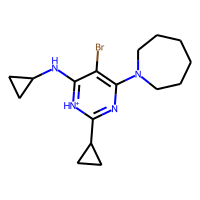
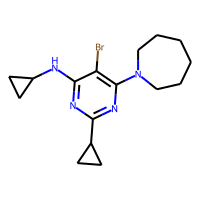
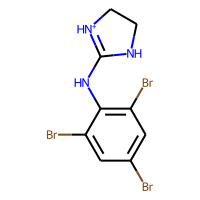
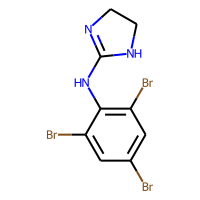

In [6]:
pd_datasets['Training'].head(2)

In [7]:
# data_folder_Bal = "../../pkasolver/data/Baltruschat/"


# SDFfile1 = data_folder_Bal + "combined_training_datasets_unique.sdf"
# SDFfile2 = data_folder_Bal + "novartis_cleaned_mono_unique_notraindata.sdf"
# SDFfile3 = data_folder_Bal + "AvLiLuMoVe_cleaned_mono_unique_notraindata.sdf"

# df1 = ps.util.import_sdf(SDFfile1)
# df2 = ps.util.import_sdf(SDFfile2)
# df3 = ps.util.import_sdf(SDFfile3)

In [ ]:
# #for df in [df1,df2,df3]:
# df1 = util.conjugates_to_DataFrame(df1)
# df1 = util.sort_conjugates(df1)
# df1 = util.pka_to_ka(df1)
# df1 = ps.util.morgan_fp(df1,"protonated",2,4096)
# df1 = ps.util.morgan_fp(df1,"deprotonated",2,4096)
# df1 = df1['pKa'].astype(float)

# df2 = util.conjugates_to_DataFrame(df2)
# df2 = util.sort_conjugates(df2)
# df2 = util.pka_to_ka(df2)
# df2 = ps.util.morgan_fp(df2,"protonated",2,4096)
# df2 = ps.util.morgan_fp(df2,"deprotonated",2,4096)

# df3 = util.conjugates_to_DataFrame(df3)
# df3 = util.sort_conjugates(df3)
# df3 = util.pka_to_ka(df3)
# df3 = ps.util.morgan_fp(df3,"protonated",2,4096)
# df3 = ps.util.morgan_fp(df3,"deprotonated",2,4096)

In [ ]:
# for df in 
# print(df1.shape)
# print(df2.shape)
# print(df3.shape)
# df1.head()

In [9]:
#diagram of pka distribution
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(14,4)
ax.set_xlim(0,14)
ax.set_xticks(range(0,14,2))

sns.set(font_scale=2)  # crazy big
sns.set_palette("colorblind")
sns.kdeplot(data=df1,x="pKa")
sns.kdeplot(data=df2,x="pKa")
sns.kdeplot(data=df3,x="pKa")
plt.legend(['train', 'novartis', 'AvLiLuMoVe'],  loc="upper right")
plt.savefig('pKa_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'plt' is not defined

In [10]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

def calc_metrics(Y_pred, Y):
    a = {"y": Y, "y_hat": Y_pred}
    df = pd.DataFrame(data=a)

    r2 = (stats.pearsonr(df["y"], df["y_hat"])[0]) ** 2
    d = df["y"] - df["y_hat"]
    mse_f = np.mean(d ** 2)
    mae_f = np.mean(abs(d))
    rmse_f = np.sqrt(mse_f)
    r2_f = 1 - (sum(d ** 2) / sum((df["y"] - np.mean(df["y"])) ** 2))

#     kl_div = compute_kl_divergence(df["y"], df["y_hat"], n_bins=20)
#     js_div = compute_js_divergence(df["y"], df["y_hat"], n_bins=20)

#     stat_info = f""" 
#     MAE = {mae_f:.4}
#     RMSE = {rmse_f:.4}
#     r^2 = {r2_f:.3}
#     """
    stat_info = f""" 
    {mae_f:.4}
    {rmse_f:.4}
    {r2_f:.3}
    """
    print(stat_info)
    return mae_f, rmse_f, r2_f

In [11]:
# # Given vectors y and y_hat, calculate MAE, RMSE and R¹
# import math
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error

# def calc_metrics(Y, Y_pred):
#     num_data = Y.shape[0]
#     linear_regressor = LinearRegression()  # create object for the class
#     linear_regressor.fit(Y.reshape(-1, 1), Y_pred.reshape(-1, 1))  # perform linear regression
#     mse = mean_squared_error(Y,Y_pred)
#     rmse = math.sqrt(mse/num_data)
#     rse = math.sqrt(mse/(num_data-2))
#     rsquare=linear_regressor.score(Y.reshape(-1, 1), Y_pred.reshape(-1, 1))
#     mae=mean_absolute_error(Y,Y_pred)
#     print(mae)
#     print(rmse)
#     print(rsquare)

In [12]:
y_test.shape

NameError: name 'y_test' is not defined

In [13]:
calc_metrics(pred1, y_test)
calc_metrics(pred2,y2)
calc_metrics(pred3,y3)



NameError: name 'pred1' is not defined

In [16]:
X_feat1,y1 = data.make_stat_variables(pd_datasets['Training'], [],["pKa"] )
X_prot=data.make_fp_array(pd_datasets['Training'],"protonated_morganfp")
X_deprot=data.make_fp_array(pd_datasets['Training'],"deprotonated_morganfp")
X1=data.cat_variables(X_prot, X_deprot)

X_feat2,y2 = data.make_stat_variables(pd_datasets['Novartis'], [],["pKa"] )
X_prot=data.make_fp_array(pd_datasets['Novartis'],"protonated_morganfp")
X_deprot=data.make_fp_array(pd_datasets['Novartis'],"deprotonated_morganfp")
X2=data.cat_variables(X_prot, X_deprot)

X_feat3,y3 = data.make_stat_variables(pd_datasets['AvLiLuMoVe'], [],["pKa"] )
X_prot=data.make_fp_array(pd_datasets['AvLiLuMoVe'],"protonated_morganfp")
X_deprot=data.make_fp_array(pd_datasets['AvLiLuMoVe'],"deprotonated_morganfp")
X3=data.cat_variables(X_prot, X_deprot)


NameError: name 'ps' is not defined

#### Modelling and testing

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [18]:
rfr=RandomForestRegressor(n_estimators=200, random_state=0)

In [ ]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, shuffle=True, random_state = 0)
#cvs=cross_val_score(rfr, X1, y1, cv=kf)


In [ ]:
#str(cvs.mean()) +" + "+ str(cvs.std())

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [ ]:
rfr.fit(X_train,y_train)

In [ ]:
pred1 = rfr.predict(X_test)
stat.plot_results(pred1,y_test,'test_plots')


In [ ]:
rfr.fit(X1,y1)
pred2 = rfr.predict(X2)
pred3 = rfr.predict(X3)

In [ ]:
ps.util.plot_results(pred2,y2,'novartis') 

In [ ]:
ps.util.plot_results(pred3,y3,'Manually combined literature pKa data (AvLiLuMoVe.sdf)') 

#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
parameters = {"n_estimators":[*range(50,501,50)]}

In [ ]:
#GSCV = ps.analysis.hyperparameter_tuning(X,y,parameters,df1)

Mesomeres and Tautomeres

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

In [ ]:
def mesfuction(smi,nB=4096, neigh=2):
    mol = Chem.MolFromSmiles(smi)
    bstring = AllChem.GetMorganFingerprintAsBitVect(mol,neigh,nBits=nB)
    X = np.zeros((1,nB))
    X[0,:] = AllChem.GetMorganFingerprintAsBitVect(mol,neigh,nBits=nB)
    #X[1,:] = AllChem.GetMorganFingerprintAsBitVect(mol,neigh,nBits=nB)
    return X

In [ ]:
Acetessigester_keton='CC(CC(OCC)=O)=O'
Acetessigester_enol ='C=C(CC(OCC)=O)-O'
Acetessigester_enol2 ='CC(=CC(OCC)=O)-O'
Acetessigester_enol3 ='CC(C=C(OCC)-O)=O'

Arginin1 = 'C(CC(C(=O)O)N)CN=C(N)N'
Arginin2 = 'C(CC(C(=O)O)N)CNC(N)=N'

CList = [Acetessigester_enol,Acetessigester_enol2,Acetessigester_enol3,Acetessigester_keton,Arginin1,Arginin2]

In [ ]:
for i in CList:
    print(rfr.predict(mesfuction(i)))



In [ ]:
m = Chem.MolFromSmiles(CList[-1])
m

In [ ]:
mesfuction('Brc1ccccc1c2nn[nH]n2')

In [ ]:
rfr.predict(mesfuction('Brc1ccccc1c2nn[nH]n2'))

In [ ]:
rfr.predict(mesfuction('Brc1ccccc1c2nn[n-]n2'))

In [ ]:
prot = 'Brc1ccccc1c2nn[nH]n2'
deprot = 'Brc1ccccc1c2nn[n-]n2'

'C=CC(=O)O'
'[CH2+]/C=C(O)/[O-]'

In [ ]:
rfr.predict(mesfuction('C=CC(=O)O'))

In [ ]:
rfr.predict(mesfuction('[CH2+]/C=C(O)/[O-]'))

In [ ]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
m

Difference function:

In [ ]:
def diffcheck(smi1,smi2,radius=3,nBits=4096):
    m1= Chem.MolFromSmiles(smi1)
    m2= Chem.MolFromSmiles(smi2)
    fp1 = AllChem.GetMorganFingerprintAsBitVect(m1,radius,nBits, useFeatures=True)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(m2,radius,nBits, useFeatures=True)
    return fp1 != fp2

In [ ]:
diffcheck('c1ccccc1','c1ccccccc1')

In [ ]:
diffcheck(Acetessigester_keton,Acetessigester_enol)

In [ ]:
diffcheck(Arginin1,Arginin2)

In [ ]:
taut = molvs.enumerate_tautomers_smiles('CC(CC(OCC)=O)=O')
Chem.ResonanceMolSupplier()